In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path='/content/drive/My Drive/Machine Learning- Session/Course Work Project/Signals_feature_2.csv' #zainab's
file_path1='/content/drive/My Drive/Machine Learning- Session/Course Work Project/Signalsfeature_Test_2.csv' #zainab's
file_path2='/content/drive/My Drive/Machine Learning- Session/Course Work Project/Signalsfeature_kaggle_2.csv' #zainab's
df_SF_2=pd.read_csv(file_path)
df_SF_test_2=pd.read_csv(file_path1)
df_SF_kaggle_2=pd.read_csv(file_path2)

Mounted at /content/drive


In [3]:
df_SF_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6310 entries, 0 to 6309
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_snippet                6310 non-null   object 
 1   activity                    6310 non-null   object 
 2   total_power_x               6310 non-null   float64
 3   total_power_y               6310 non-null   float64
 4   total_power_z               6310 non-null   float64
 5   thd_x                       6310 non-null   float64
 6   thd_y                       6310 non-null   float64
 7   thd_z                       6310 non-null   float64
 8   iqr_x                       6310 non-null   float64
 9   iqr_y                       6310 non-null   float64
 10  iqr_z                       6310 non-null   float64
 11  kurtosis_x                  6310 non-null   float64
 12  kurtosis_y                  6310 non-null   float64
 13  kurtosis_z                  6310 

In [ ]:
# Extract features and target
X = df_SF_2.drop(columns=['activity', 'user_snippet'])  # Features (excluding 'activity' and 'user_snippet')
y = df_SF_2['activity']
X_test_df = df_SF_test_2.drop(columns=['activity', 'user_snippet'])
y_test_df = df_SF_test_2['activity']
X_kaggle=df_SF_kaggle_2.drop(columns=['user_snippet'])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_df_encoded = label_encoder.transform(y_test_df)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_df_scaled = scaler.transform(X_test_df)
X_kaggle_scaled = scaler.transform(X_kaggle)

In [ ]:
# Split training data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train_encoded, test_size=0.2, random_state=42)

In [ ]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.5),  # Dropout for regularization
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax')  # 6 classes for activity prediction
])

In [ ]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train_final, y_train_final, epochs=30, batch_size=28, validation_data=(X_val, y_val))

Epoch 1/30
145/145 [==============================] - 1s 4ms/step - loss: 0.9179 - accuracy: 0.6947 - val_loss: 0.5063 - val_accuracy: 0.8396
Epoch 2/30
145/145 [==============================] - 0s 3ms/step - loss: 0.5695 - accuracy: 0.8041 - val_loss: 0.4045 - val_accuracy: 0.8663
Epoch 3/30
145/145 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.8279 - val_loss: 0.3610 - val_accuracy: 0.8802
Epoch 4/30
145/145 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.8492 - val_loss: 0.3372 - val_accuracy: 0.8851
Epoch 5/30
145/145 [==============================] - 0s 3ms/step - loss: 0.3998 - accuracy: 0.8633 - val_loss: 0.3250 - val_accuracy: 0.8842
Epoch 6/30
145/145 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8618 - val_loss: 0.3129 - val_accuracy: 0.8891
Epoch 7/30
145/145 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8705 - val_loss: 0.3009 - val_accuracy: 0.8980
Epoch 

In [ ]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test_df_scaled, y_test_df_encoded)
print(f'Test Accuracy: {test_accuracy}')

61/61 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.8692
Test Accuracy: 0.8691830635070801


In [ ]:
# Train the model
history = model.fit(X_train_final, y_train_final, epochs=40, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/40
127/127 [==============================] - 0s 3ms/step - loss: 0.2452 - accuracy: 0.9188 - val_loss: 0.2429 - val_accuracy: 0.9248
Epoch 2/40
127/127 [==============================] - 0s 3ms/step - loss: 0.2229 - accuracy: 0.9264 - val_loss: 0.2500 - val_accuracy: 0.9307
Epoch 3/40
127/127 [==============================] - 0s 3ms/step - loss: 0.2392 - accuracy: 0.9217 - val_loss: 0.2480 - val_accuracy: 0.9248
Epoch 4/40
127/127 [==============================] - 0s 3ms/step - loss: 0.2355 - accuracy: 0.9215 - val_loss: 0.2496 - val_accuracy: 0.9297
Epoch 5/40
127/127 [==============================] - 0s 4ms/step - loss: 0.2205 - accuracy: 0.9255 - val_loss: 0.2458 - val_accuracy: 0.9297
Epoch 6/40
127/127 [==============================] - 1s 5ms/step - loss: 0.2290 - accuracy: 0.9264 - val_loss: 0.2548 - val_accuracy: 0.9277
Epoch 7/40
127/127 [==============================] - 1s 5ms/step - loss: 0.2173 - accuracy: 0.9225 - val_loss: 0.2488 - val_accuracy: 0.9218
Epoch 

In [ ]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test_df_scaled, y_test_df_encoded)
print(f'Test Accuracy: {test_accuracy}')

61/61 [==============================] - 0s 2ms/step - loss: 0.9686 - accuracy: 0.8563
Test Accuracy: 0.8562564849853516


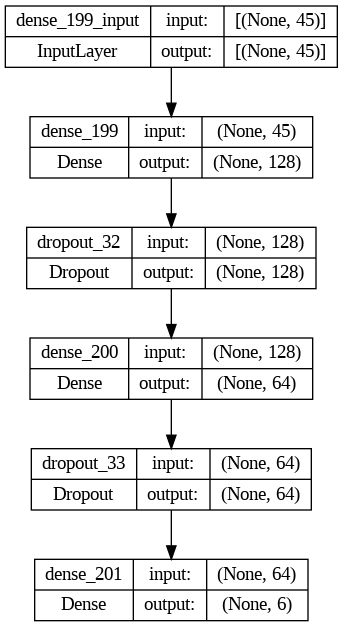

In [ ]:
from keras.utils import plot_model

# Plot the architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True,)

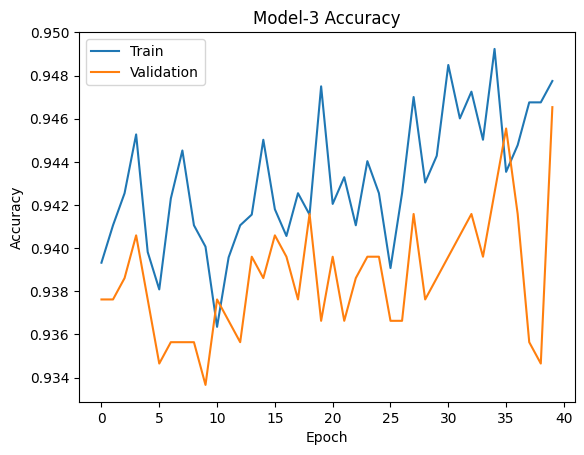

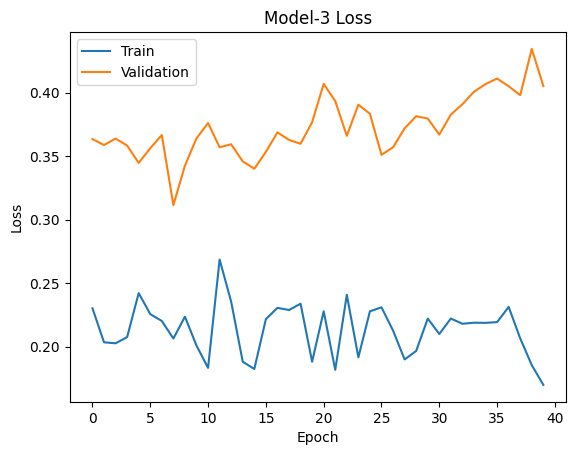

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model-3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model-3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

61/61 [==============================] - 0s 2ms/step


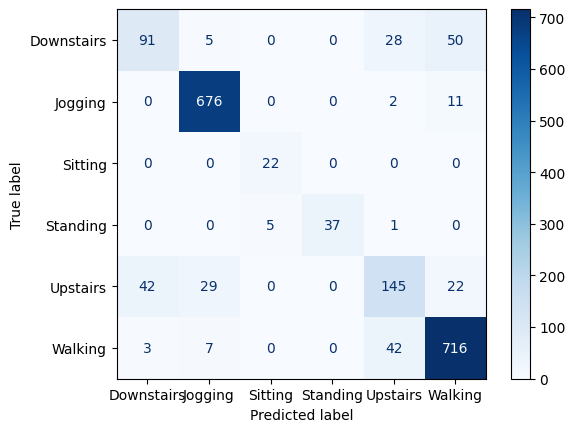

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test_df_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)


# Reverse decoding (if encoded)
decoded_test_labels = label_encoder.inverse_transform(y_test_df_encoded)
decoded_pred_labels = label_encoder.inverse_transform(y_pred_classes)

# Generate confusion matrix
cm = confusion_matrix(decoded_test_labels, decoded_pred_labels)

# Plot confusion matrix with light blue color
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
model.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_214 (Dense)           (None, 128)               5888      
                                                                 
 dropout_42 (Dropout)        (None, 128)               0         
                                                                 
 dense_215 (Dense)           (None, 64)                8256      
                                                                 
 dropout_43 (Dropout)        (None, 64)                0         
                                                                 
 dense_216 (Dense)           (None, 6)                 390       
                                                                 
Total params: 14534 (56.77 KB)
Trainable params: 14534 (56.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Make predictions on Kaggle dataset
kaggle_probabilities = model.predict(X_kaggle_scaled)

# Get the index of the class with the highest probability for each sample
kaggle_predictions = np.argmax(kaggle_probabilities, axis=1)

# Decode the predicted labels
kaggle_predictions_decoded = label_encoder.inverse_transform(kaggle_predictions)


79/79 [==============================] - 0s 2ms/step


In [ ]:
# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions ANN4_sandbox.csv'

# Save predictions for the Kaggle data to a CSV file
df_SF_kaggle_2['prediction'] = kaggle_predictions_decoded
df_SF_kaggle_2.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions ANN4_sandbox.csv


In [ ]:
# Define a function to create neural network models with varying complexity
def create_model(num_layers, num_neurons, input_shape):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for _ in range(num_layers):
        model.add(keras.layers.Dense(num_neurons, activation='relu'))
    model.add(keras.layers.Dense(6, activation='softmax'))  # Output layer with 6 classes for activity prediction
    return model

In [ ]:
# Experiment with different model complexities
num_layers_list = [1, 2,3]  # Try different numbers of hidden layers
num_neurons_list = [32, 64, 128]  # Try different numbers of neurons per hidden layer 64, 128, 256

best_model = None
best_accuracy = 0

for num_layers in num_layers_list:
    for num_neurons in num_neurons_list:
        # Create and compile the model
        model = create_model(num_layers, num_neurons, input_shape=X_train_scaled.shape[1:])
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train_final, y_train_final, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)

        # Evaluate the model on the validation set
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

        print(f"Number of layers: {num_layers}, Number of neurons: {num_neurons}, Validation Accuracy: {val_accuracy}")

        # Keep track of the best model based on validation accuracy
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_model = model

Number of layers: 1, Number of neurons: 32, Validation Accuracy: 0.9168316721916199
Number of layers: 1, Number of neurons: 64, Validation Accuracy: 0.9267326593399048
Number of layers: 1, Number of neurons: 128, Validation Accuracy: 0.9336633682250977
Number of layers: 2, Number of neurons: 32, Validation Accuracy: 0.9247524738311768
Number of layers: 2, Number of neurons: 64, Validation Accuracy: 0.9405940771102905
Number of layers: 2, Number of neurons: 128, Validation Accuracy: 0.9445544481277466
Number of layers: 3, Number of neurons: 32, Validation Accuracy: 0.9445544481277466
Number of layers: 3, Number of neurons: 64, Validation Accuracy: 0.9445544481277466
Number of layers: 3, Number of neurons: 128, Validation Accuracy: 0.9475247263908386


In [ ]:
# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_df_scaled, y_test_df_encoded)
print(f'Best Model Test Accuracy: {test_accuracy}')

61/61 [==============================] - 0s 2ms/step - loss: 0.9634 - accuracy: 0.8661
Best Model Test Accuracy: 0.866080641746521


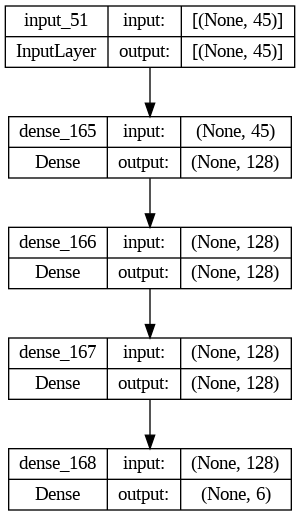

In [ ]:
plot_model(best_model, to_file='model_architecture2.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model
history_best = best_model.fit(X_train_final, y_train_final, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
127/127 [==============================] - 1s 6ms/step - loss: 0.0298 - accuracy: 0.9911 - val_loss: 0.2143 - val_accuracy: 0.9475
Epoch 2/20
127/127 [==============================] - 1s 6ms/step - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.2422 - val_accuracy: 0.9436
Epoch 3/20
127/127 [==============================] - 1s 5ms/step - loss: 0.0267 - accuracy: 0.9921 - val_loss: 0.2335 - val_accuracy: 0.9455
Epoch 4/20
127/127 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 0.2598 - val_accuracy: 0.9446
Epoch 5/20
127/127 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9941 - val_loss: 0.2476 - val_accuracy: 0.9446
Epoch 6/20
127/127 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9931 - val_loss: 0.2937 - val_accuracy: 0.9396
Epoch 7/20
127/127 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9975 - val_loss: 0.2931 - val_accuracy: 0.9436
Epoch 

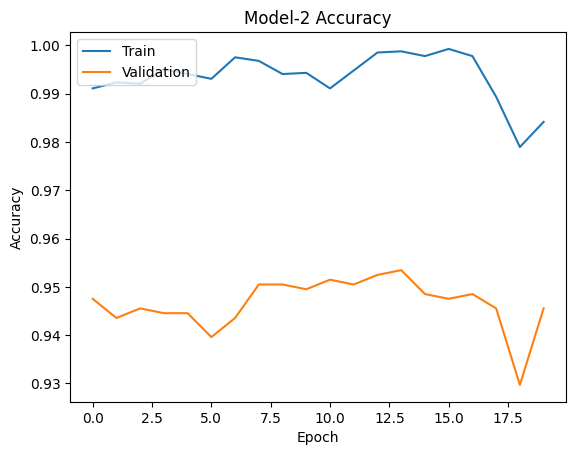

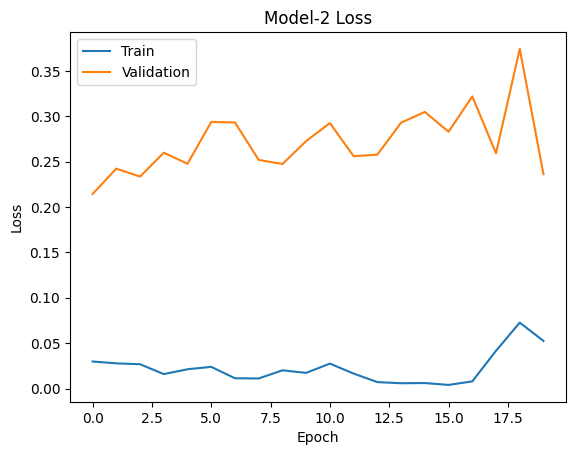

In [ ]:
# Plot training history
plt.plot(history_best.history['accuracy'])
plt.plot(history_best.history['val_accuracy'])
plt.title('Model-2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_best.history['loss'])
plt.plot(history_best.history['val_loss'])
plt.title('Model-2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

61/61 [==============================] - 0s 2ms/step


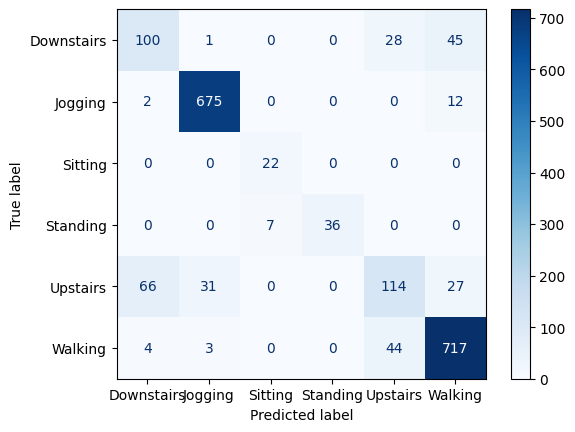

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = best_model.predict(X_test_df_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)


# Reverse decoding (if encoded)
decoded_test_labels = label_encoder.inverse_transform(y_test_df_encoded)
decoded_pred_labels = label_encoder.inverse_transform(y_pred_classes)

# Generate confusion matrix
cm = confusion_matrix(decoded_test_labels, decoded_pred_labels)

# Plot confusion matrix with light blue color
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
 best_model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 128)               5888      
                                                                 
 dense_166 (Dense)           (None, 128)               16512     
                                                                 
 dense_167 (Dense)           (None, 128)               16512     
                                                                 
 dense_168 (Dense)           (None, 6)                 774       
                                                                 
Total params: 39686 (155.02 KB)
Trainable params: 39686 (155.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Make predictions on Kaggle dataset
kaggle_probabilities = model.predict(X_kaggle_scaled)

# Get the index of the class with the highest probability for each sample
kaggle_predictions = np.argmax(kaggle_probabilities, axis=1)

# Decode the predicted labels
kaggle_predictions_decoded = label_encoder.inverse_transform(kaggle_predictions)


79/79 [==============================] - 0s 2ms/step


In [ ]:
# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions ANN2_Sandbox.csv'

# Save predictions for the Kaggle data to a CSV file
df_SF_kaggle_2['prediction'] = kaggle_predictions_decoded
df_SF_kaggle_2.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions ANN2_Sandbox.csv


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
# Reshape input data for CNN (assuming X_train_scaled is 2D)
input_shape = (X_train_scaled.shape[1], 1)
# Define the neural network architecture (CNN)
model_cnn = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=input_shape),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(6, activation='softmax')  # 6 classes for activity prediction
])


In [ ]:
model_cnn.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history_cnn = model_cnn.fit(X_train_final.reshape(-1, X_train_scaled.shape[1], 1),
                    y_train_final,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val.reshape(-1, X_train_scaled.shape[1], 1), y_val))

Epoch 1/50
127/127 [==============================] - 31s 24ms/step - loss: 0.8028 - accuracy: 0.7288 - val_loss: 0.5093 - val_accuracy: 0.8109
Epoch 2/50
127/127 [==============================] - 2s 18ms/step - loss: 0.5082 - accuracy: 0.8227 - val_loss: 0.3714 - val_accuracy: 0.8713
Epoch 3/50
127/127 [==============================] - 2s 14ms/step - loss: 0.4178 - accuracy: 0.8497 - val_loss: 0.3534 - val_accuracy: 0.8614
Epoch 4/50
127/127 [==============================] - 2s 14ms/step - loss: 0.3719 - accuracy: 0.8707 - val_loss: 0.2972 - val_accuracy: 0.8901
Epoch 5/50
127/127 [==============================] - 2s 19ms/step - loss: 0.3173 - accuracy: 0.8824 - val_loss: 0.3144 - val_accuracy: 0.8901
Epoch 6/50
127/127 [==============================] - 2s 19ms/step - loss: 0.2889 - accuracy: 0.9012 - val_loss: 0.2985 - val_accuracy: 0.8911
Epoch 7/50
127/127 [==============================] - 2s 19ms/step - loss: 0.2631 - accuracy: 0.9104 - val_loss: 0.4370 - val_accuracy: 0.844

In [ ]:
num_features = X_test_df_scaled.shape[1]

# Reshape the test data for the Conv1D layer
X_test_reshaped = X_test_df_scaled.reshape(-1, num_features, 1)

In [ ]:
# Evaluate the model on the reshaped test data
test_loss, test_accuracy = model_cnn.evaluate(X_test_reshaped, y_test_df_encoded)
print(f'Test Accuracy: {test_accuracy}')


61/61 [==============================] - 0s 5ms/step - loss: 1.5137 - accuracy: 0.8289
Test Accuracy: 0.828852117061615


61/61 [==============================] - 0s 4ms/step


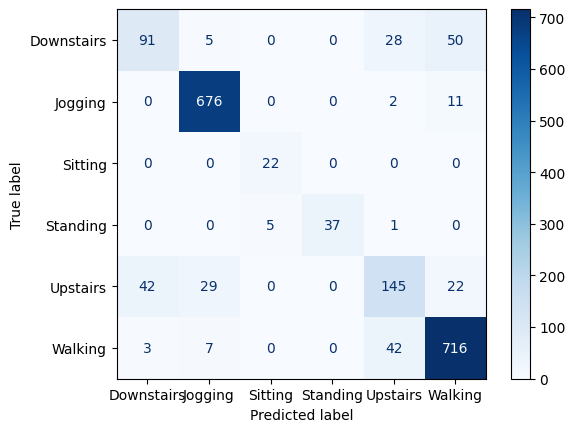

In [ ]:
y_pred_cnn = model_cnn.predict(X_test_reshaped)
y_pred_classes_cnn = np.argmax(y_pred, axis=1)


# Reverse decoding (if encoded)
decoded_test_labels = label_encoder.inverse_transform(y_test_df_encoded)
decoded_pred_labels = label_encoder.inverse_transform(y_pred_classes_cnn)

# Generate confusion matrix
cm = confusion_matrix(decoded_test_labels, decoded_pred_labels)

# Plot confusion matrix with light blue color
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.show()

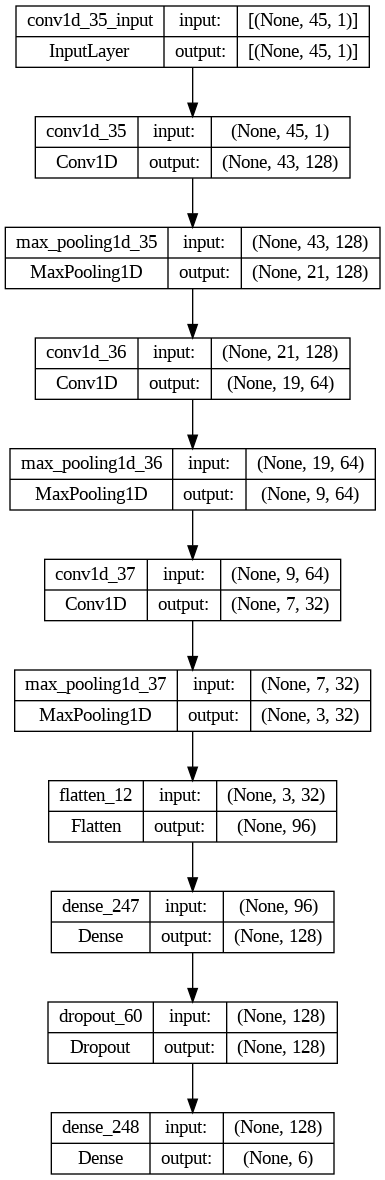

In [ ]:
plot_model(model_cnn, to_file='model_architecture2.png', show_shapes=True, show_layer_names=True)

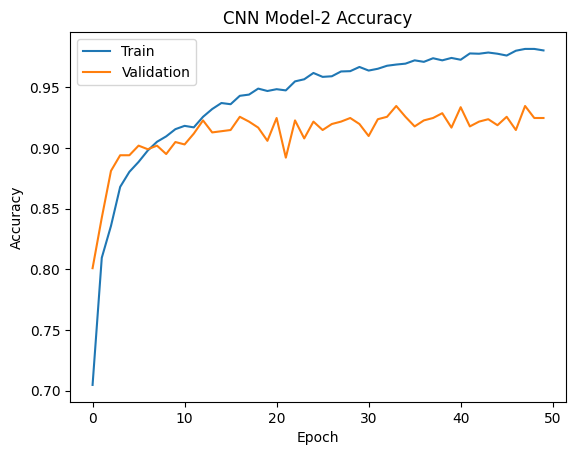

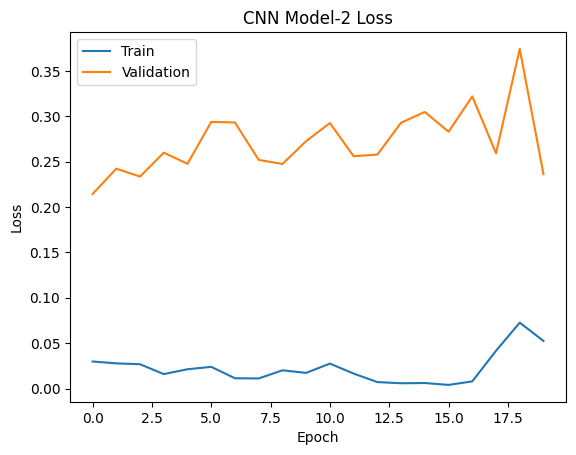

In [ ]:
# Plot training history
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model-2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_best.history['loss'])
plt.plot(history_best.history['val_loss'])
plt.title('CNN Model-2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Make predictions on Kaggle dataset
kaggle_probabilities_cnn = model_cnn.predict(X_kaggle_scaled)

# Get the index of the class with the highest probability for each sample
kaggle_predictions_cnn = np.argmax(kaggle_probabilities_cnn, axis=1)

# Decode the predicted labels
kaggle_predictions_decoded = label_encoder.inverse_transform(kaggle_predictions)

InvalidArgumentError: Graph execution error:

Detected at node sequential_81/conv1d_35/Conv1D defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-264-cfda98db11ec>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 290, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 262, in convolution_op

convolution input must be 4-dimensional: [1,32,45]
	 [[{{node sequential_81/conv1d_35/Conv1D}}]] [Op:__inference_predict_function_2005307]

In [ ]:
# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions Cnn1_Sandbox.csv'

# Save predictions for the Kaggle data to a CSV file
df_SF_kaggle_2['prediction'] = kaggle_predictions_decoded
df_SF_kaggle_2.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions Cnn1_Sandbox.csv
